#### This is a mini version of the model demonstration so that it can easily be ran without having to download a large file of images.

#### In order to run this code you will need to download the CarRecDemoTests folder and the VehicleTypeModel51.h5 file included in the GitHub respository. Replace the respective directories in cells 2 and 3 and run all. 

In [ ]:
from google.colab import drive, files
import pandas as pd
import numpy as np
import os
from PIL import Image
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
import matplotlib.image as mpimg

In [34]:
#Replace the directory with the directory you saved the VehicleTypeModel51.h5 file in.
CarClassModel = tf.keras.models.load_model('/content/drive/MyDrive/Deep Learning/SavedModels/VehicleTypeModel51.h5')

In [35]:
#Replace the directory with the directory containing the CarRecDemoTests image folder you downloaded.
tests = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/CarRecDemoTests', color_mode='grayscale', labels='inferred',
    image_size=(224, 224), seed=10, shuffle=False)

Found 18 files belonging to 9 classes.


### View A Summary of the Model

In [36]:
CarClassModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)     

### Evaluation of Model On Test Images

In [37]:
evaluate = CarClassModel.evaluate(tests)

1/1 [==============================] - 2s 2s/step - loss: 1.4263 - accuracy: 0.5000


### Use Model To Make Predictions

In [38]:
predictions = CarClassModel.predict(tests)

1/1 [==============================] - 1s 831ms/step


In [39]:
#Make a list of the ground truths for comparison.
file_paths = tests.file_paths
groundTruths = []
testImages = []
for path in file_paths:
  imgFile, groundTruth, img = path.rsplit('/', 2)
  groundTruths.append(groundTruth)
  testImages.append(img)

### Compare Predictions With Ground Truths

In [40]:
#Print predictions and the ground truths.
ind = np.argmax(predictions, axis=1)
prediction_labels = []
for i in ind:
  prediction_labels.append(tests.class_names[i])

print("Predictions: ")
print(prediction_labels)
print("Ground Truths: ")
print(groundTruths)

Predictions: 
['SUV', 'Cab', 'Sedan', 'Convertible', 'Coupe', 'Convertible', 'Sedan', 'Convertible', 'Sedan', 'Sedan', 'SUV', 'SUV', 'Sedan', 'Sedan', 'Van', 'Van', 'Sedan', 'Minivan']
Ground Truths: 
['Cab', 'Cab', 'Convertible', 'Convertible', 'Coupe', 'Coupe', 'Hatchback', 'Hatchback', 'Minivan', 'Minivan', 'SUV', 'SUV', 'Sedan', 'Sedan', 'Van', 'Van', 'Wagon', 'Wagon']


##### Ground Truths

Ground Truths: 


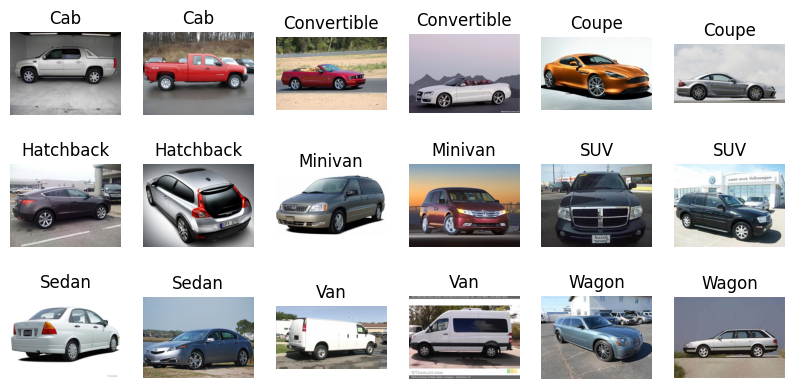

In [41]:
#Look at the images with their class.
file_paths = tests.file_paths

print('Ground Truths: ')
plt.figure(figsize=(10, 10))
i = 1
for image in file_paths:
        imgFile, groundTruth, img = image.rsplit('/', 2)
        ax = plt.subplot(6, 6, i )
        img = mpimg.imread(image)
        plt.imshow(img)
        plt.title(groundTruth)
        plt.axis("off")
        i = i+1

##### Predictions

Predictions: 


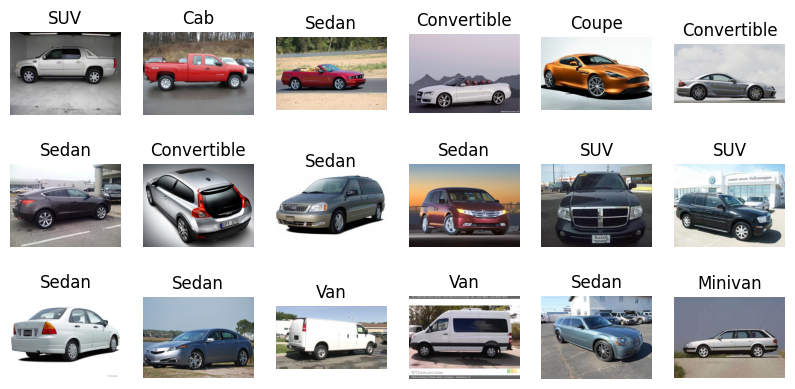

In [42]:
print('Predictions: ')
plt.figure(figsize=(10, 10))
i = 0
for image in file_paths:
        imgFile, groundTruth, img = image.rsplit('/', 2)
        ax = plt.subplot(6, 6, i+1)
        img = mpimg.imread(image)
        plt.imshow(img)
        plt.title(prediction_labels[i])
        plt.axis("off")
        i = i+1